In [30]:
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
small_model_results = """
EPOCH: 1
Training...
Validating..
Training Loss: 0.11445920239686966
Training R2: 0.09492530479330907
Validation Loss: 0.07657423138618469
Validation R2: 0.38458043408687204
EPOCH: 2
Training...
Validating..
Training Loss: 0.059507686468958855
Training R2: 0.5291890671599278
Validation Loss: 0.04915609514713287
Validation R2: 0.6071949355970354
EPOCH: 3
Training...
Validating..
Training Loss: 0.048333830511569975
Training R2: 0.617695500939466
Validation Loss: 0.047783786714076994
Validation R2: 0.6179602532942224
EPOCH: 4
Training...
Validating..
Training Loss: 0.04770515920370817
Training R2: 0.6228980963116038
Validation Loss: 0.04976100659370422
Validation R2: 0.6021319801909673
EPOCH: 5
Training...
Validating..
Training Loss: 0.04756199116557837
Training R2: 0.6243578155806946
Validation Loss: 0.04761791008710861
Validation R2: 0.6194281353196691
EPOCH: 6
Training...
Validating..
Training Loss: 0.047621055108308795
Training R2: 0.6235681524911474
Validation Loss: 0.04735711094737053
Validation R2: 0.6215372170812197
EPOCH: 7
Training...
Validating..
Training Loss: 0.04735446311980486
Training R2: 0.6253947650986038
Validation Loss: 0.047264871150255204
Validation R2: 0.6222334192446222
EPOCH: 8
Training...
Validating..
Training Loss: 0.04742441643476486
Training R2: 0.6248338066714422
Validation Loss: 0.04733640196919441
Validation R2: 0.6216571072927761
EPOCH: 9
Training...
Validating..
Training Loss: 0.047454807338118556
Training R2: 0.6248345375187795
Validation Loss: 0.04715833073854447
Validation R2: 0.6230896111313151
EPOCH: 10
Training...
Validating..
Training Loss: 0.04719132972061634
Training R2: 0.6268852575107637
Validation Loss: 0.04754517188668251
Validation R2: 0.6198261340675837
EPOCH: 11
Training...
Validating..
Training Loss: 0.04721202025860548
Training R2: 0.6265263546596236
Validation Loss: 0.04712838712334633
Validation R2: 0.623251613126651
EPOCH: 12
Training...
Validating..
Training Loss: 0.047234361669421195
Training R2: 0.6263692237690287
Validation Loss: 0.0470116750895977
Validation R2: 0.6243129221510231
EPOCH: 13
Training...
Validating..
Training Loss: 0.047327978324890135
Training R2: 0.6275410427311678
Validation Loss: 0.047235215425491334
Validation R2: 0.6227568772433745
EPOCH: 14
Training...
Validating..
Training Loss: 0.04714362900704146
Training R2: 0.6282052076004248
Validation Loss: 0.04687534466385841
Validation R2: 0.6252712255435162
EPOCH: 15
Training...
Validating..
Training Loss: 0.0468171967625618
Training R2: 0.6296733621438502
Validation Loss: 0.049269558548927304
Validation R2: 0.6060744633348238
EPOCH: 16
Training...
Validating..
Training Loss: 0.04704404284358025
Training R2: 0.6282538335221776
Validation Loss: 0.04704379594326019
Validation R2: 0.6238116146622841
EPOCH: 17
Training...
Validating..
Training Loss: 0.04707689118236303
Training R2: 0.6281739587775984
Validation Loss: 0.04707076317071915
Validation R2: 0.6236361167915956
EPOCH: 18
Training...
Validating..
Training Loss: 0.04714081211388111
Training R2: 0.627477551415299
Validation Loss: 0.04688995936512947
Validation R2: 0.6251312275687035
EPOCH: 19
Training...
Validating..
Training Loss: 0.04715406945943832
Training R2: 0.626982640876065
Validation Loss: 0.04683059057593346
Validation R2: 0.625736846489015
EPOCH: 20
Training...
Validating..
Training Loss: 0.04688669713288546
Training R2: 0.6292546376256685
Validation Loss: 0.0474133228957653
Validation R2: 0.6211825689842544
EPOCH: 21
Training...
Validating..
Training Loss: 0.04688596356362104
Training R2: 0.6290632078278796
Validation Loss: 0.04774405696988106
Validation R2: 0.6186468736339954
EPOCH: 22
Training...
Validating..
Training Loss: 0.04724518403857946
Training R2: 0.6274835905987437
Validation Loss: 0.04743292379379273
Validation R2: 0.6207590864796787
EPOCH: 23
Training...
Validating..
Training Loss: 0.04687570812255144
Training R2: 0.6294520263328947
Validation Loss: 0.04685838428139687
Validation R2: 0.625542851404752
EPOCH: 24
Training...
Validating..
Training Loss: 0.04689693901687861
Training R2: 0.6290370547395066
Validation Loss: 0.04675823539495468
Validation R2: 0.6259771953448381
EPOCH: 25
Training...
Validating..
Training Loss: 0.04684099947959185
Training R2: 0.6300053499242033
Validation Loss: 0.048470120310783384
Validation R2: 0.6127043690862729
EPOCH: 26
Training...
Validating..
Training Loss: 0.04667905537933111
Training R2: 0.6310678387392074
Validation Loss: 0.050219851583242416
Validation R2: 0.5985726591692433
EPOCH: 27
Training...
Validating..
Training Loss: 0.046792647752165795
Training R2: 0.6299617481930653
Validation Loss: 0.048150498002767564
Validation R2: 0.6151212008499185
EPOCH: 28
Training...
Validating..
Training Loss: 0.04682003775388002
Training R2: 0.6296830772408037
Validation Loss: 0.049071373254060746
Validation R2: 0.6078089412943164
EPOCH: 29
Training...
Validating..
Training Loss: 0.04698843588083983
Training R2: 0.6287850186320159
Validation Loss: 0.046615678936243056
Validation R2: 0.6274778853496279
EPOCH: 30
Training...
Validating..
Training Loss: 0.046706503827869894
Training R2: 0.6304381854647545
Validation Loss: 0.04663484236598015
Validation R2: 0.6273089188837038
"""

In [34]:
big_model_results = """
EPOCH: 1
Training...
Validating..
Training Loss: 0.08905371643602848
Training R2: 0.2953459964552545
Validation Loss: 0.052137311577796934
Validation R2: 0.5836729792517356
EPOCH: 2
Training...
Validating..
Training Loss: 0.048875328396260735
Training R2: 0.6133134601015383
Validation Loss: 0.04682518228888512
Validation R2: 0.6263735144194839
EPOCH: 3
Training...
Validating..
Training Loss: 0.04746927834302187
Training R2: 0.6248991828819621
Validation Loss: 0.04630105969309807
Validation R2: 0.6298349771187035
EPOCH: 4
Training...
Validating..
Training Loss: 0.04711990982443094
Training R2: 0.6271849878472529
Validation Loss: 0.04620628783106804
Validation R2: 0.631059211998199
EPOCH: 5
Training...
Validating..
Training Loss: 0.04671085598766804
Training R2: 0.6304316539454872
Validation Loss: 0.04662705433368683
Validation R2: 0.6275586598150567
EPOCH: 6
Training...
Validating..
Training Loss: 0.04648522130399942
Training R2: 0.6323090767000857
Validation Loss: 0.045439408719539644
Validation R2: 0.6374748497649664
EPOCH: 7
Training...
Validating..
Training Loss: 0.046759088303148746
Training R2: 0.6303268185112396
Validation Loss: 0.046193516880273816
Validation R2: 0.6319773462361649
EPOCH: 8
Training...
Validating..
Training Loss: 0.046648017387092115
Training R2: 0.6324081116594287
Validation Loss: 0.04548618891835213
Validation R2: 0.6381833239191597
EPOCH: 9
Training...
Validating..
Training Loss: 0.045888468199968335
Training R2: 0.6373303713128322
Validation Loss: 0.04822823724150658
Validation R2: 0.6148763814888681
EPOCH: 10
Training...
Validating..
Training Loss: 0.046486744798719885
Training R2: 0.6330476540820333
Validation Loss: 0.05073091143369675
Validation R2: 0.5963517812863448
EPOCH: 11
Training...
Validating..
Training Loss: 0.05157134868204594
Training R2: 0.6351362696917708
Validation Loss: 0.048709154963493345
Validation R2: 0.6123301839375801
EPOCH: 12
Training...
Validating..
Training Loss: 0.04573993558287621
Training R2: 0.6381482987750313
Validation Loss: 0.04471515922248363
Validation R2: 0.6444309329048143
EPOCH: 13
Training...
Validating..
Training Loss: 0.04567841803878546
Training R2: 0.6386919441995185
Validation Loss: 0.04513765913248062
Validation R2: 0.6403007203442033
EPOCH: 14
Training...
Validating..
Training Loss: 0.04504376453608275
Training R2: 0.6436577755726163
Validation Loss: 0.046195107787847516
Validation R2: 0.6314227719278287
EPOCH: 15
Training...
Validating..
Training Loss: 0.04561846616864204
Training R2: 0.6394500158338248
Validation Loss: 0.04476882770657539
Validation R2: 0.6437021758934856
EPOCH: 16
Training...
Validating..
Training Loss: 0.04483971901386976
Training R2: 0.6464373082020743
Validation Loss: 0.04590942761301994
Validation R2: 0.6345030734151794
EPOCH: 17
Training...
Validating..
Training Loss: 0.04503549084663391
Training R2: 0.643880620462335
Validation Loss: 0.04718832236528397
Validation R2: 0.623588599272431
EPOCH: 18
Training...
Validating..
Training Loss: 0.04491790162026882
Training R2: 0.6446598101187072
Validation Loss: 0.04654441760480404
Validation R2: 0.6304487201343365
EPOCH: 19
Training...
Validating..
Training Loss: 0.044629379157722
Training R2: 0.6469948330495302
Validation Loss: 0.04452109369635582
Validation R2: 0.6451649176700076
EPOCH: 20
Training...
Validating..
Training Loss: 0.04471111455112696
Training R2: 0.6462716544665187
Validation Loss: 0.04447526888549328
Validation R2: 0.6460232859290936
EPOCH: 21
Training...
Validating..
Training Loss: 0.044235831037163734
Training R2: 0.650104074946377
Validation Loss: 0.047454414144158366
Validation R2: 0.6217186598991293
EPOCH: 22
Training...
Validating..
Training Loss: 0.044215634161233905
Training R2: 0.650194918768679
Validation Loss: 0.04427706065773964
Validation R2: 0.6465254512365063
EPOCH: 23
Training...
Validating..
Training Loss: 0.04438653595000505
Training R2: 0.6492370997690593
Validation Loss: 0.048414478331804275
Validation R2: 0.6136905255387956
EPOCH: 24
Training...
Validating..
Training Loss: 0.04457204054892063
Training R2: 0.6476393935844689
Validation Loss: 0.044245889872312545
Validation R2: 0.6479772702245133
EPOCH: 25
Training...
Validating..
Training Loss: 0.04416869940161705
Training R2: 0.6506966155399587
Validation Loss: 0.04431140165030956
Validation R2: 0.6466188904234259
EPOCH: 26
Training...
Validating..
Training Loss: 0.04556225238442421
Training R2: 0.6507029918650784
Validation Loss: 0.046899240881204604
Validation R2: 0.6251944696015068
EPOCH: 27
Training...
Validating..
Training Loss: 0.044043660712242125
Training R2: 0.6519994588326847
Validation Loss: 0.04709453457593918
Validation R2: 0.6258365101972931
EPOCH: 28
Training...
Validating..
Training Loss: 0.04427369326651096
Training R2: 0.6500687485417693
Validation Loss: 0.044060663685202596
Validation R2: 0.6492818906577338
EPOCH: 29
Training...
Validating..
Training Loss: 0.04359291308373213
Training R2: 0.6551525741211124
Validation Loss: 0.044734593868255616
Validation R2: 0.643255740280976
EPOCH: 30
Training...
Validating..
Training Loss: 0.04391302953213453
Training R2: 0.6527160420610535
Validation Loss: 0.04461794500052929
Validation R2: 0.6443267168631839"""

In [41]:
def give_dataframe(results_log):
    pattern = r"""
EPOCH: (\d{1,2})
Training...
Validating..
Training Loss: (\d\.\d+)
Training R2: (\d\.\d+)
Validation Loss: (\d\.\d+)
Validation R2: (\d\.\d+)"""
    results = re.findall(pattern, results_log)
    results = pd.DataFrame(results, columns=['epoch', 'train_loss', 'train_r2', 'val_loss', 'val_r2'])
    results = results.astype(float).astype({'epoch': 'int'})
    return results

In [42]:
small_results_df = give_dataframe(small_model_results)

In [43]:
big_results_df = give_dataframe(big_model_results)

In [49]:
big_results_df

,epoch,train_loss,train_r2,val_loss,val_r2
0,1,0.089054,0.295346,0.052137,0.583673
1,2,0.048875,0.613313,0.046825,0.626374
2,3,0.047469,0.624899,0.046301,0.629835
3,4,0.047120,0.627185,0.046206,0.631059
4,5,0.046711,0.630432,0.046627,0.627559
5,6,0.046485,0.632309,0.045439,0.637475
6,7,0.046759,0.630327,0.046194,0.631977
7,8,0.046648,0.632408,0.045486,0.638183
8,9,0.045888,0.637330,0.048228,0.614876
9,10,0.046487,0.633048,0.050731,0.596352


In [67]:
sns.set()
sns.set_context('talk')

In [70]:
# high dpi retina
%config InlineBackend.figure_format = 'retina'

In [82]:
big_results_df['val_r2'].max()

0.6492818906577338

In [83]:
small_results_df['val_r2'].max()

0.6274778853496279

Text(0, 0.5, 'R-squared')

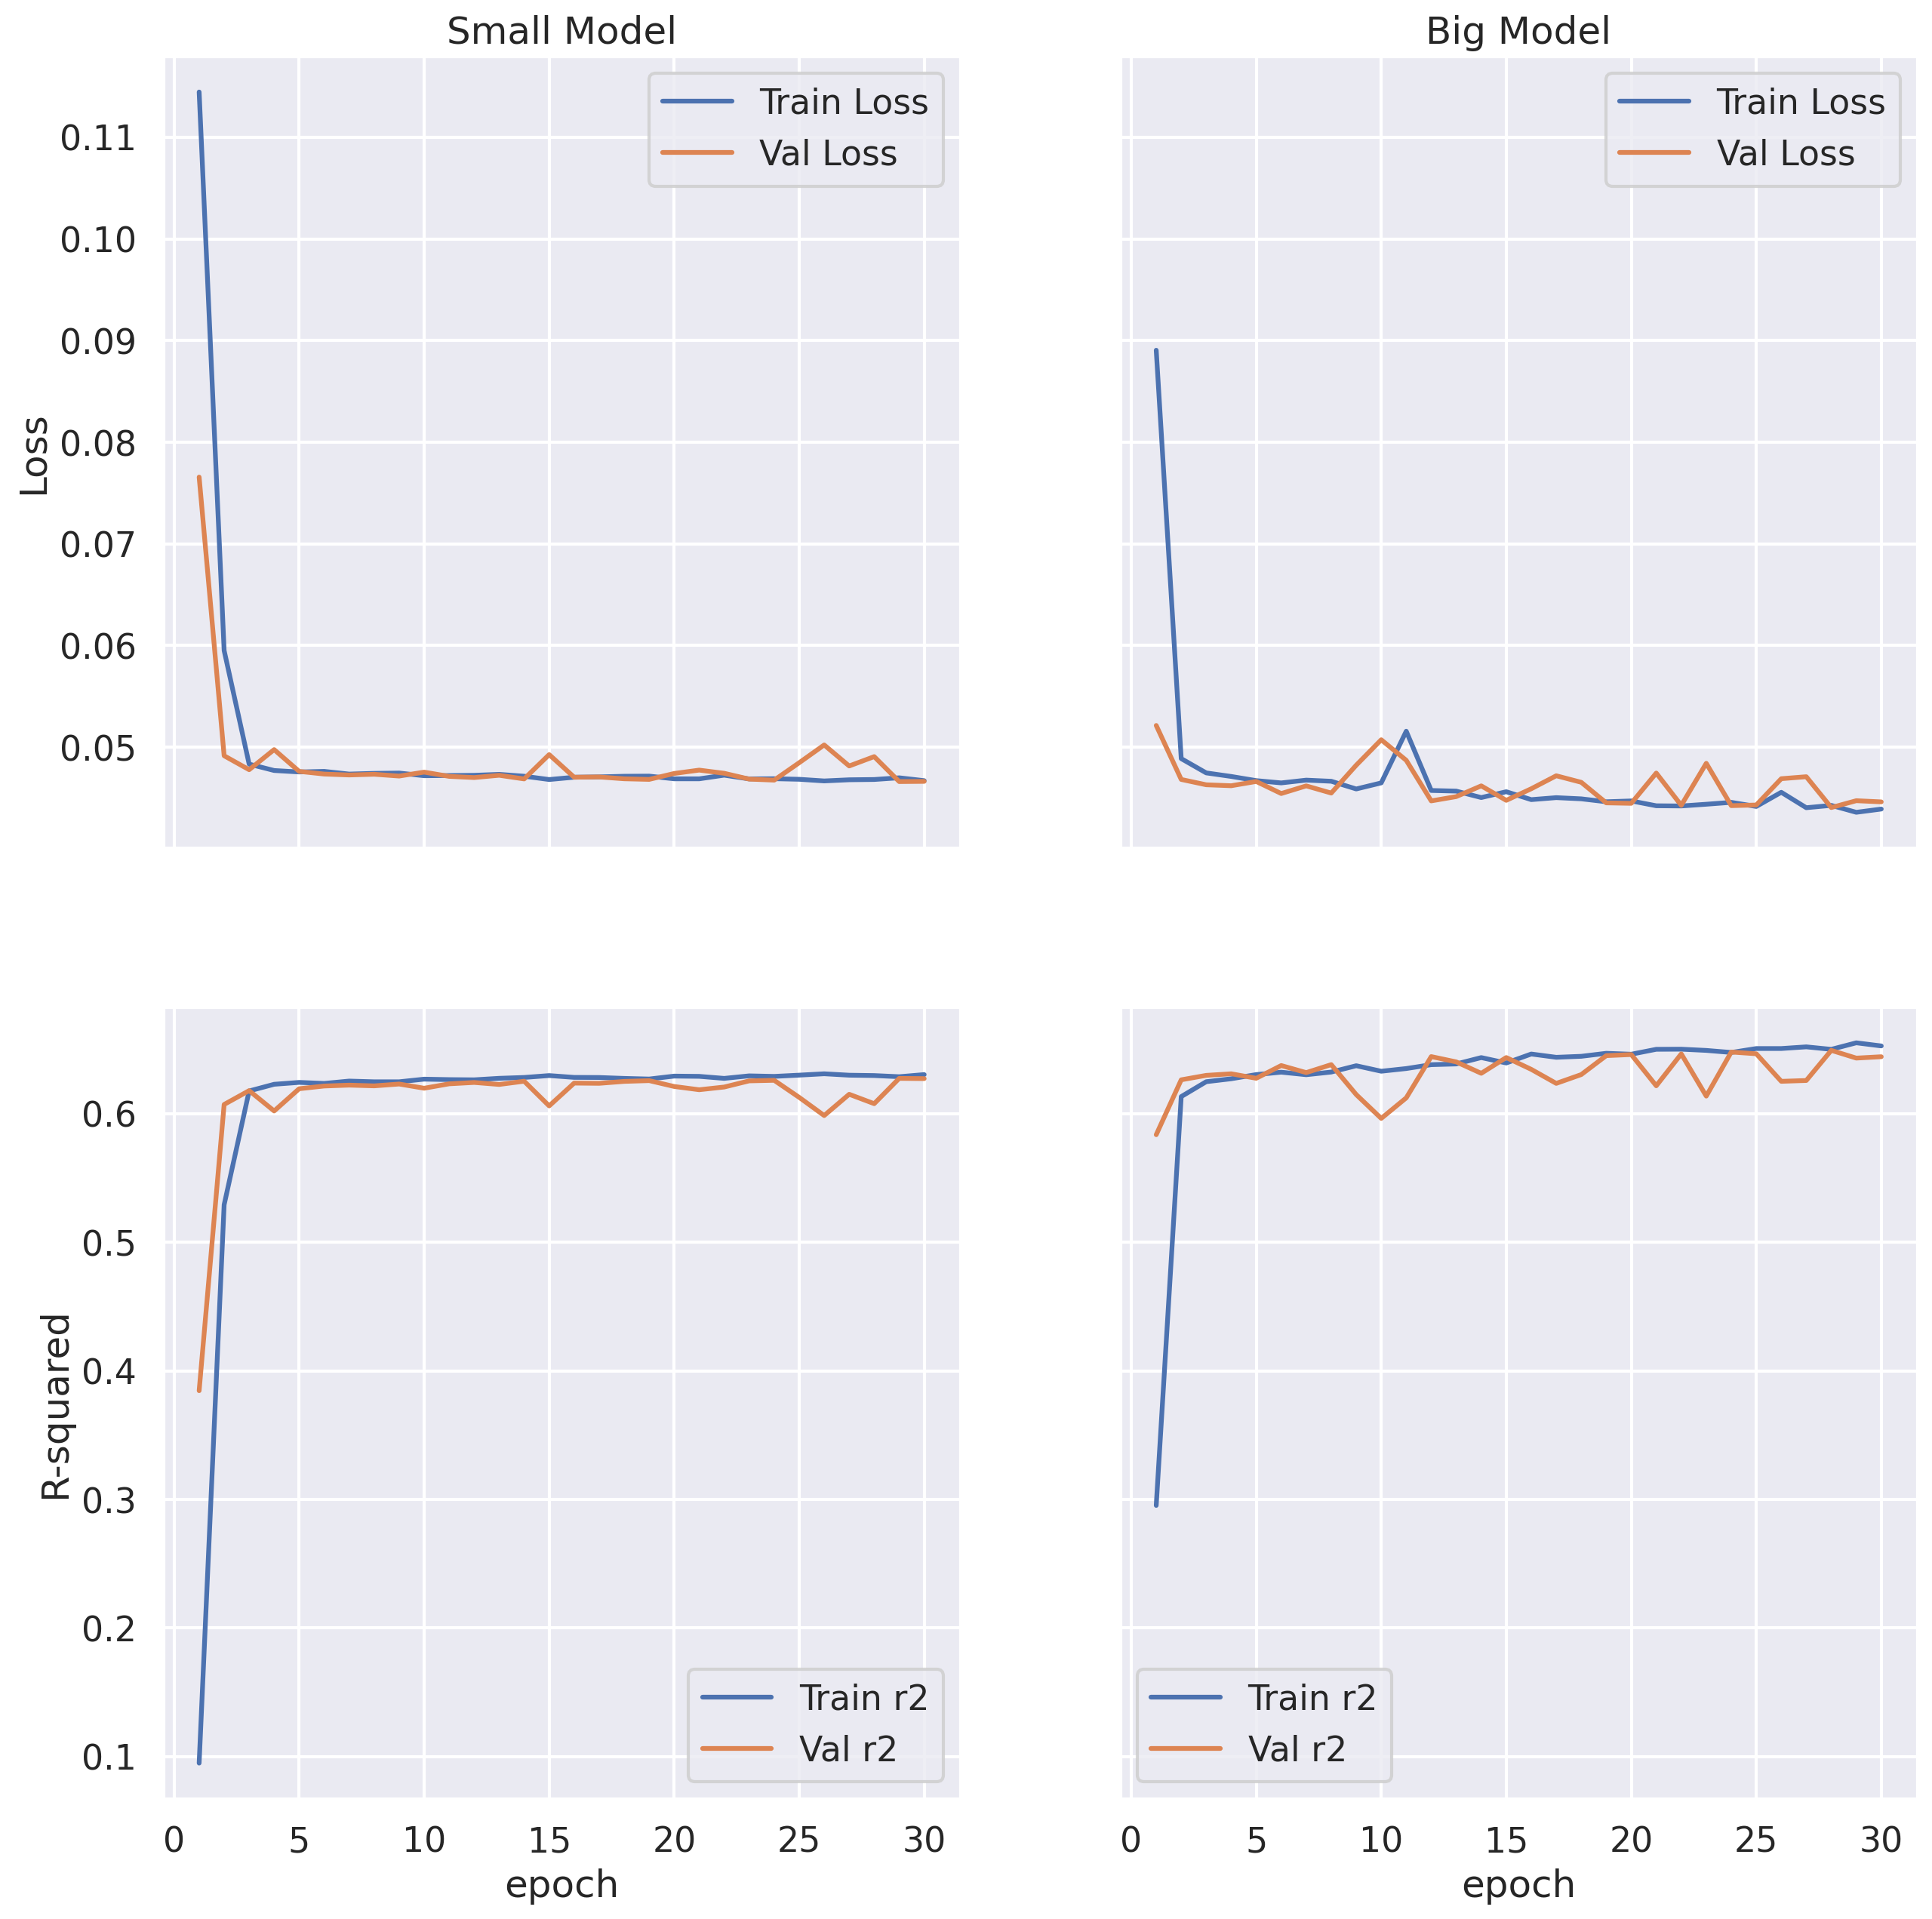

In [80]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15), sharey='row', sharex=True)

sns.lineplot(x='epoch', y='train_loss', data=small_results_df, label='Train Loss', ax=ax1)
sns.lineplot(x='epoch', y='val_loss', data=small_results_df, label='Val Loss', ax=ax1)
ax1.set_title('Small Model')


sns.lineplot(x='epoch', y='train_loss', data=big_results_df, label='Train Loss', ax=ax2)
sns.lineplot(x='epoch', y='val_loss', data=big_results_df, label='Val Loss', ax=ax2)
ax2.set_title('Big Model')
# plt.yscale('log')

ax1.set_ylabel('')

sns.lineplot(x='epoch', y='train_r2', data=small_results_df, label='Train r2', ax=ax3)
sns.lineplot(x='epoch', y='val_r2', data=small_results_df, label='Val r2', ax=ax3)
# ax1.set_title('Small Model')


sns.lineplot(x='epoch', y='train_r2', data=big_results_df, label='Train r2', ax=ax4)
sns.lineplot(x='epoch', y='val_r2', data=big_results_df, label='Val r2', ax=ax4)
# ax2.set_title('Big Model')
# plt.yscale('log')

ax3.set_ylabel('')

ax1.set_ylabel('Loss')

ax3.set_ylabel('R-squared')

Text(0, 0.5, '')

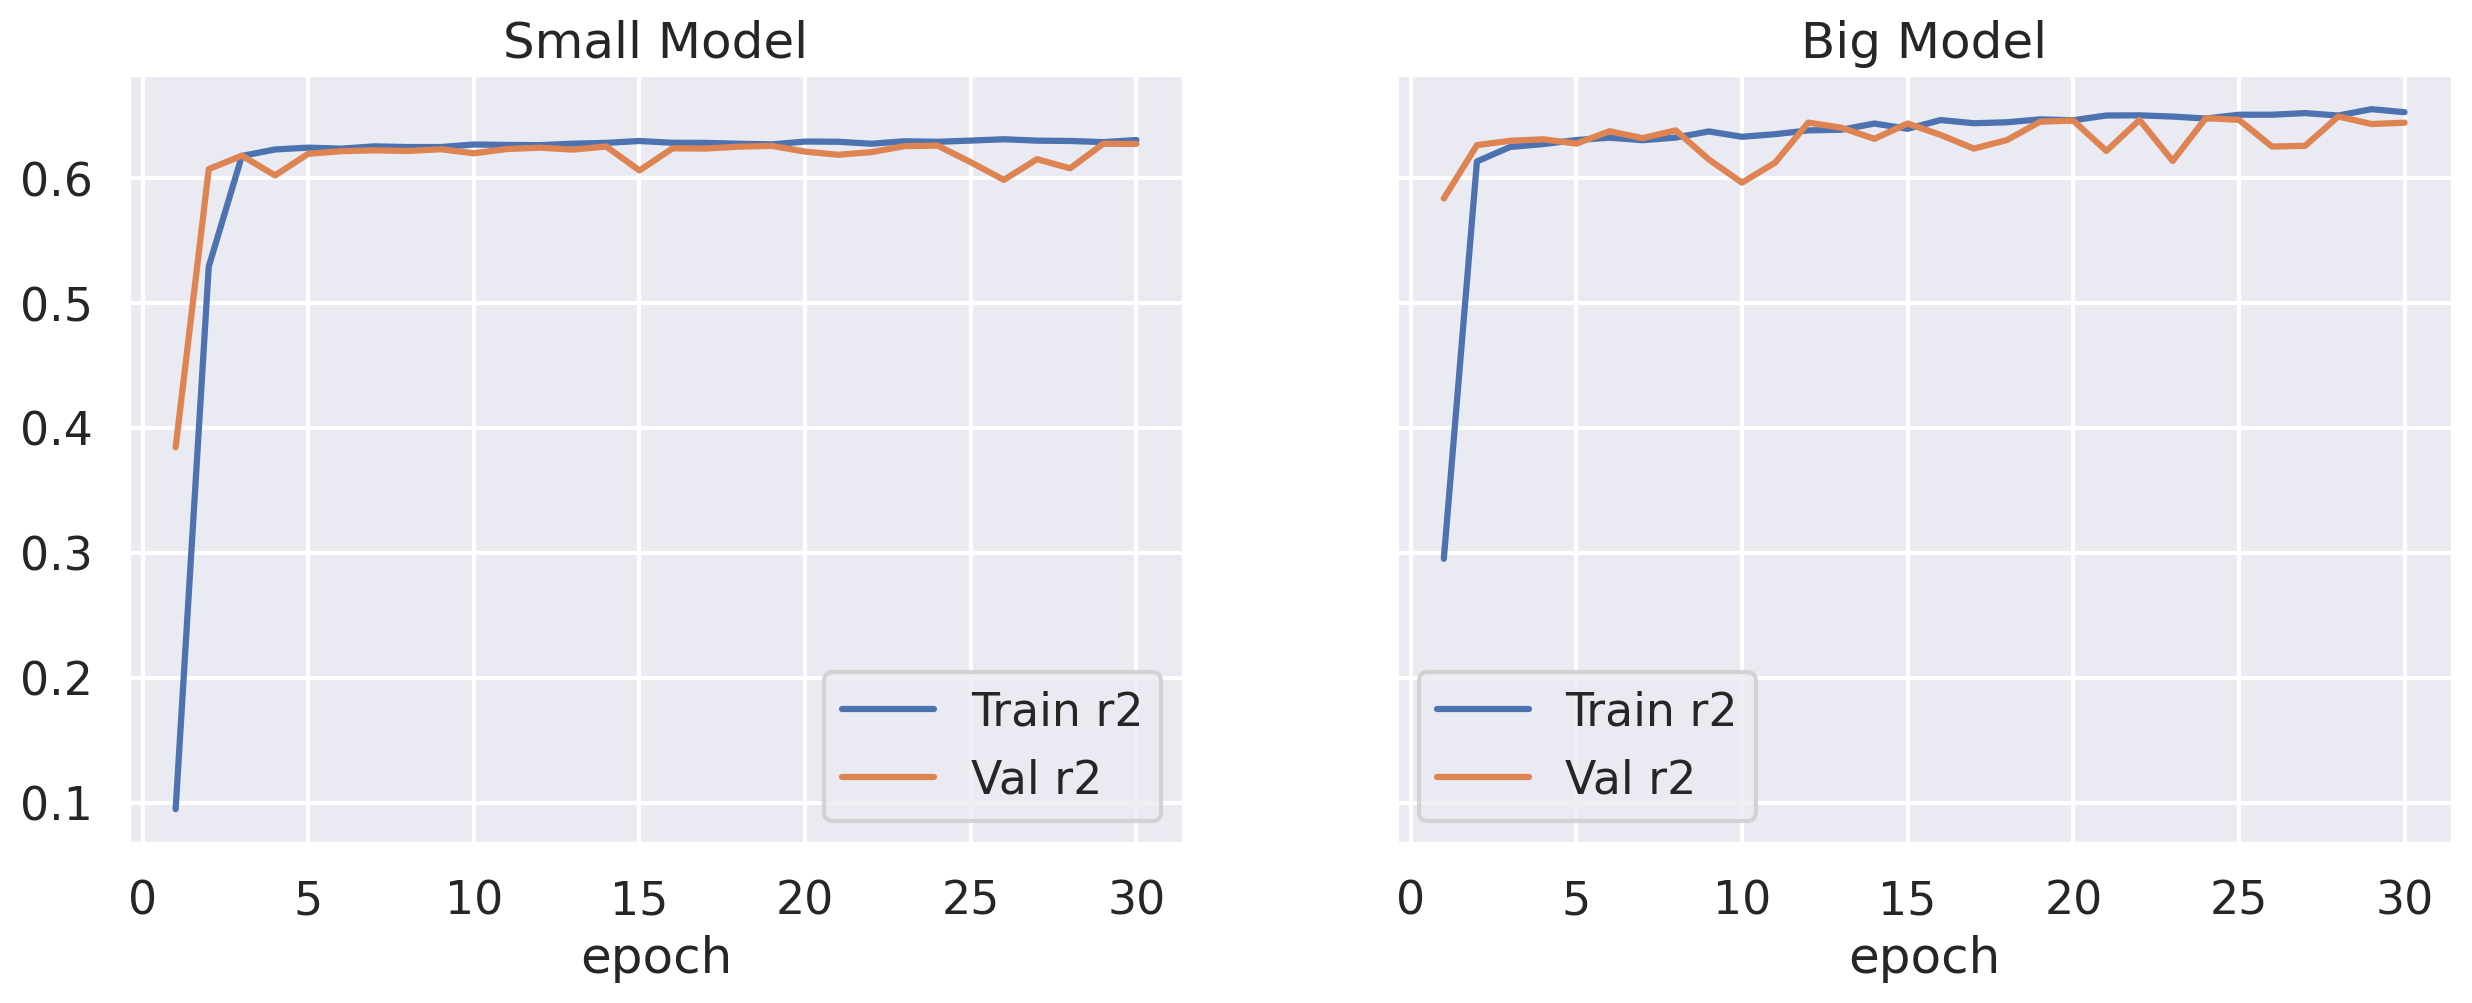

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x='epoch', y='train_r2', data=small_results_df, label='Train r2', ax=ax1)
sns.lineplot(x='epoch', y='val_r2', data=small_results_df, label='Val r2', ax=ax1)
ax1.set_title('Small Model')


sns.lineplot(x='epoch', y='train_r2', data=big_results_df, label='Train r2', ax=ax2)
sns.lineplot(x='epoch', y='val_r2', data=big_results_df, label='Val r2', ax=ax2)
ax2.set_title('Big Model')
# plt.yscale('log')

ax1.set_ylabel('')